## Importing Libraries

In [1]:
#!pip install plotly
#!pip install --upgrade mplfinance
#!pip install ta-lib
#!pip install --upgrade numpy
import numpy as np
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
import talib
import plotly.graph_objects as go
import mplfinance as mpl

## Reading Data

In [2]:
url="https://raw.githubusercontent.com/vishalprakash97/Financial-Trading-using-RRL/main/Security%20Data/NYSE_20yr_OHLC.csv"
download = requests.get(url).content

df = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [3]:
df.drop(columns=['Name'],inplace=True)
df['Date']=pd.to_datetime(df['Date'])

## EDA

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5265.000000,5265.000000,5265.000000,5265.000000,5265.000000,5.265000e+03
mean,9213.969064,9259.499930,9164.051780,9214.984676,9214.984676,3.330560e+09
std,2825.468601,2834.216365,2816.245765,2825.540731,2825.540731,1.490668e+09
min,4226.310059,4321.759766,4181.750000,4226.310059,4226.310059,0.000000e+00
25%,6978.859863,7020.339844,6937.189941,6980.620117,6980.620117,2.174890e+09
50%,8797.160156,8845.830078,8738.690430,8797.290039,8797.290039,3.403230e+09
75%,11008.759766,11045.639648,10969.940430,11013.240234,11013.240234,4.114040e+09
max,17310.509766,17364.310547,17285.550781,17310.509766,17310.509766,1.145623e+10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5265 entries, 0 to 5264
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5265 non-null   datetime64[ns]
 1   Open       5265 non-null   float64       
 2   High       5265 non-null   float64       
 3   Low        5265 non-null   float64       
 4   Close      5265 non-null   float64       
 5   Adj Close  5265 non-null   float64       
 6   Volume     5265 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 288.1 KB


#### No null values in dataset

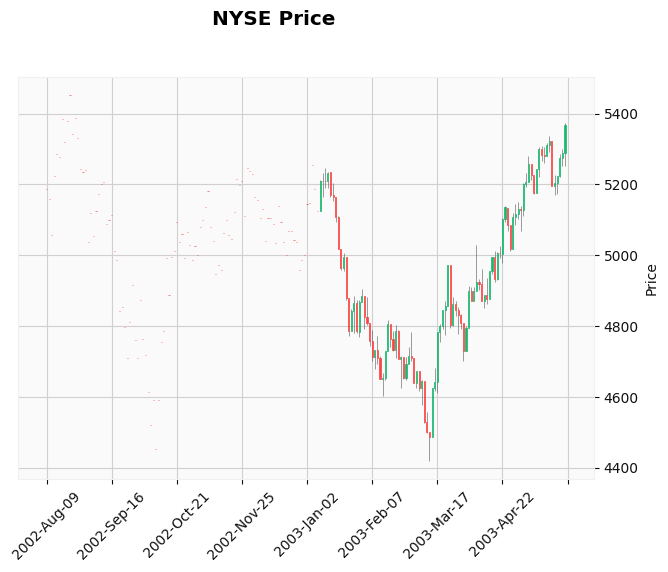

In [6]:
df_dt=df.set_index(df['Date'])
df_dt.drop(columns=["Date","Adj Close",'Volume'],inplace=True)
df_dt[:20]
name="NYSE"
mpl.plot(df_dt[400:600],type="candle",title = f"{name} Price",  style="yahoo")

In [7]:
df[df['High']==df['Low']]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,6785.689941,6785.689941,6785.689941,6785.689941,6785.689941,0
1,2001-01-03,6968.830078,6968.830078,6968.830078,6968.830078,6968.830078,1880700000
2,2001-01-04,6894.810059,6894.810059,6894.810059,6894.810059,6894.810059,2169400000
3,2001-01-05,6774.060059,6774.060059,6774.060059,6774.060059,6774.060059,1430800000
4,2001-01-08,6759.049805,6759.049805,6759.049805,6759.049805,6759.049805,1115500000
...,...,...,...,...,...,...,...
500,2003-01-02,5146.000000,5146.000000,5146.000000,5146.000000,5146.000000,1229200000
501,2003-01-03,5148.450195,5148.450195,5148.450195,5148.450195,5148.450195,1130800000
502,2003-01-06,5255.390137,5255.390137,5255.390137,5255.390137,5255.390137,1398100000
503,2003-01-07,5186.919922,5186.919922,5186.919922,5186.919922,5186.919922,1545200000


Open=High=Low=Close for the first 505 values. I'm not sure if data is buggy, or it doesn't exist

## Feature Engineering

 #### Techincal Indicators being used:
 1. Momentum Indicators: 
    * Momentum (MOM)
    * Moving Average Convergence Divergence (MACD)
    * Money Flow Index (MFI)
    * Relative Strength Index (RSI)
    
2. Volatility indicators: 
    * Average True Range (ATR)
    * Normalized Average True Range (NATR)
    
3. cycle indicators:
    * Hilbert Transform Dominant Cycle Phase (HTDCP)
    * Hilbert Transform Sinewave (HTS)
    * Hilbert Transform Trend Market Mode (HTTMM)

4. volume indicators: 
    * Chaikin Oscillator (CO), 
    * On Balance Volume (OBV).
    
#### References:
1. [TA-Lib Documentation](https://mrjbq7.github.io/ta-lib/doc_index.html)
    

In [8]:
#Momentum indicators

#real = MOM(close, timeperiod=10)
#macd, macdsignal, macdhist = MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
#real = MFI(high, low, close, volume, timeperiod=14)
#real = RSI(close, timeperiod=14)

ta=pd.DataFrame()
ta['mom']=pd.DataFrame(talib.MOM(df['Close']))
ta['macd'], ta['macdsignal'], ta['macdhist'] = talib.MACD(df['Close'])
ta['mfi']=talib.MFI(df['High'],df['Low'],df['Close'],df['Volume'])
ta['rsi']=talib.RSI(df['Close'])

#Volatility Indicators

#real = ATR(high, low, close, timeperiod=14)
#real = NATR(high, low, close, timeperiod=14)
ta['atr'] = talib.ATR(df['High'], df['Low'], df['Close'])
ta['natr']=talib.NATR(df['High'], df['Low'], df['Close'])


#Cycle Indicators

#real = HT_DCPHASE(close)
#sine, leadsine = HT_SINE(close)
#integer = HT_TRENDMODE(close)
ta['htdcp']=talib.HT_DCPHASE(df['Close'])
ta['hts'],ta['hts_lead']=talib.HT_SINE(df['Close'])
ta['httmm']=talib.HT_TRENDMODE(df['Close'])

#Volume Indicators

#real = ADOSC(high, low, close, volume, fastperiod=3, slowperiod=10)
#real = OBV(close, volume)
ta['co']=talib.ADOSC(df['High'], df['Low'], df['Close'], df['Volume'])
ta['obv'] = talib.OBV(df['Close'], df['Volume'])

In [9]:
ta.shape

(5265, 14)

In [10]:
ta.isnull().sum()

mom           10
macd          33
macdsignal    33
macdhist      33
mfi           14
rsi           14
atr           14
natr          14
htdcp         63
hts           63
hts_lead      63
httmm          0
co             9
obv            0
dtype: int64

### Notes 
1. talib.MACD outputs 3 variables: macd, macdsignal and macdhist
2. talib.ht_SINE ouputs 2 variables: sine, leadsine
3. Leading null values in generated TAs due to aggregation
4. Drop extra columns and null values

### Further Steps
1. Explore inconsistency in dataset
2. Normalization
3. PCA
4. DWT
